In [1]:
# cumulative time series

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read data
# file_location = "/..."
# file_name = 'data.csv'
my_data = pd.read_csv('data.csv')
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [ ]:
# deal with data
import datetime
my_data.date = pd.to_datetime(my_data.date, format = '%Y%m%d')

In [15]:
# function: get cummulative series for each id
def getCumSeries(my_data, my_id, country, vertical):
    # filter certain country, vertical's date and spend_usd
    table = my_data[['date', 'spend_usd']][(my_data.experiment_id == my_id) & (my_data.country == country) & (my_data.vertical == vertical)]
    # calculate sum of spend_usd, group by date 
    data = table.groupby('date')['spend_usd'].sum()
    # calculate cumulative sum for data
    data = np.cumsum(data)
    # get total_revenue (last row)
    total_revenue = data[-1]
    return((data, total_revenue))

In [16]:
# test
blue = getCumSeries(my_data, 12624549, 'JP', 'ANDROID_APPS')
blue

(date
 2017-04-01    15139.743602
 2017-04-02    23692.226787
 2017-04-03    29446.059652
 2017-04-04    34234.700951
 2017-04-05    42858.682130
 2017-04-06    47171.363749
 2017-04-07    53496.677770
 Name: spend_usd, dtype: float64, 53496.67777000003)

In [32]:
import matplotlib.ticker as mtick
def plotSeries(experiment_series, control_series, country, vertical):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color = "red", label = "experiment")
    ax.plot(control_series, color = "blue", label = "control")
    # tweaks
    ax.set_ylim(0, 100000)
    ax.set_title(country + " " + vertical + " " + "experiment v.s control")
    ax.set_ylabel("Total Spend")
    ax.grid(True, which = "both")
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    # change legend
    ax.legend().get_texts()[0].set_text("experiment")
    ax.legend().get_texts()[1].set_text("control")
    # format date
    plt.gcf().autofmt_xdate()

In [33]:
def printCumSeries(my_data, experiment_ids, country, vertical):
    # get unique date
    index_series = np.unique(my_data.date)
    # sort date
    index_series = np.sort(index_series)
    # group by date
    my_data = my_data.sort_values("date", ascending = True, inplace = False)
    # get cumulative series and total revenue respectively
    treatment_series = getCumSeries(my_data, experiment_ids[0], country, vertical)[0]
    treatment_revenue = getCumSeries(my_data, experiment_ids[0], country, vertical)[1]
    control_series = getCumSeries(my_data, experiment_ids[1], country, vertical)[0]
    control_revenue = getCumSeries(my_data, experiment_ids[1], country, vertical)[1]
    
    # print out overall uplift
    print("Overall % uplift on revenue:" + str((treatment_revenue - control_revenue)/control_revenue))
    # plot
    plotSeries(treatment_series, control_series, country, vertical)

Overall % uplift on revenue:-0.1953911263039544


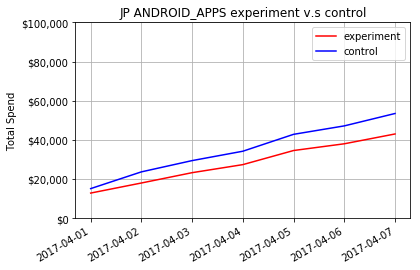

In [34]:
printCumSeries(my_data, [12624548, 12624549], 'JP', 'ANDROID_APPS')

Overall % uplift on revenue:-0.04716141869593589


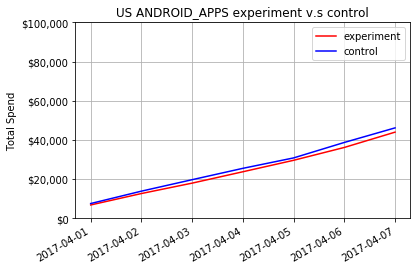

In [35]:
printCumSeries(my_data, [12624548,12624549], 'US', 'ANDROID_APPS')